Problem 1

(a)

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [96]:
def NewtonInterpolate(x, f):
    n = len(x)
    a = np.zeros((n, n))
    res = np.zeros(n)
    res[0] = f[0]
    
    for i in range(n):
        a[i][0] = f[i]
    
    for j in range(1, n):
        for i in range(j, n):
            a[i][j] = (a[i][j-1] - a[i-1][j-1])/(x[i] - x[i-j])
        
   
 
    return np.diag(a)
            
    
    
        

In [47]:
a = NewtonInterpolate(np.array([0,1,-1,2,-2]),np.array([-5,-3,-15,39,-9]))

In [48]:
a

array([-5.,  2., -4.,  8.,  3.])

(b)

In [98]:
def Horner(a, xl, x):
    n = len(a)
    p = a[n-1]
    res = np.zeros(len(x))
    for j in range(len(x)):
        p = a[n-1]
        for i in range(n-2, -1, -1):
            p = p*(x[j] - xl[i]) + a[i]
        
        res[j] = p
            
    return res
    

(c)

In [103]:

def update_interpolation(a, x, x_new, f_new):
    """
    input:
    a: vector with n-1 entries, existing n-1 polynomial coefficients
    x: vector with n-1 entries, existing n-1 polynomial x_i
    x_new: scalar, new point x_i
    f_new: scalar, new point f_i
    output:
    updated coefficients a 
    """
    if x_new in x:
        return "Invalid x_new. Please provide new interpolation point x!"
    
    resid = f_new - a[0]
    product = 1
    for i in range(len(x)-1):
        product = product*(x_new - x[i])
        resid -= product*a[i+1]
    a_new = resid/(product*(x_new - x[-1]))
    a = np.append(a,np.array(a_new))
    return a
        

In [67]:
a_new = np.append(a, np.array(1))

In [68]:
a_new

array([-5.,  2., -4.,  8.,  3.,  1.])

In [54]:
a = NewtonInterpolate(np.array([0,1,-1,2,-2]),np.array([-5,-3,-15,39,-9]))

In [55]:
a

array([-5.,  2., -4.,  8.,  3.])

In [94]:
a1 = NewtonInterpolate(np.array([0,1,-1,2]),np.array([-5,-3,-15,39]))

In [95]:
a1

array([-5.,  2., -4.,  8.])

In [104]:
update_interpolation(a1,np.array([0,1,-1,2]), -2, -9 )

array([-5.,  2., -4.,  8.,  3.])

(d)

In [76]:
def f1(x):
    result = np.zeros(len(x))
    for i in range(len(x)):
        result[i] = math.exp(-x[i]**2)
    return result
    

In [77]:
def f2(x):
    result = np.zeros(len(x))
    for i in range(len(x)):
        result[i] = math.sin(2*x[i])
    return result

In [119]:
def f3(x):
    result = np.zeros(len(x))
    for i in range(len(x)):
        result[i] = math.cos(x[i])*math.sin(3*x[i])
    return result

In [73]:
x = np.linspace(-2, 4, 100)

In [74]:
x1 = np.linspace(-2, 4, 5)

In [78]:
a1 = NewtonInterpolate(x1, f1(x1))

In [79]:
a1

array([ 0.01831564,  0.5069901 , -0.26031255,  0.06006809, -0.00738545])

In [83]:
p1 = Horner(a1, x1, x)

In [85]:
x2 = np.linspace(-2, 4, 10)

In [86]:
a2 =  NewtonInterpolate(x2, f1(x2))

In [87]:
p2 = Horner(a2, x2, x)

In [88]:
x3 = np.linspace(-2, 4, 20)

In [90]:
a3 = NewtonInterpolate(x3, f1(x3))

In [91]:
p3 = Horner(a3, x3, x)

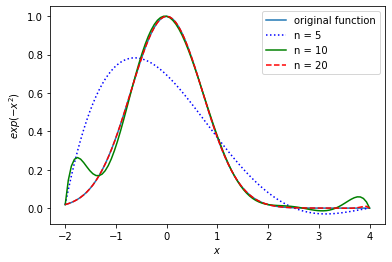

In [109]:
fig = plt.figure()
x = np.linspace(-2, 4, 100)
plt.plot(x, f1(x), label = "original function")
plt.plot(x, p1, ':b', label = "n = 5")
plt.plot(x, p2, '-g', label = "n = 10")
plt.plot(x, p3, '--r', label = "n = 20")
plt.xlabel('$x$')
plt.ylabel('$exp(-x^2)$')
plt.legend()
plt.show()

In [110]:
a12 = NewtonInterpolate(x1, f2(x1))

In [111]:
a22 = NewtonInterpolate(x2, f2(x2))

In [112]:
a32 = NewtonInterpolate(x3, f2(x3))

In [113]:
p12 = Horner(a12, x1, x)

In [114]:
p22 = Horner(a22, x2, x)

In [115]:
p32 = Horner(a32, x3, x)

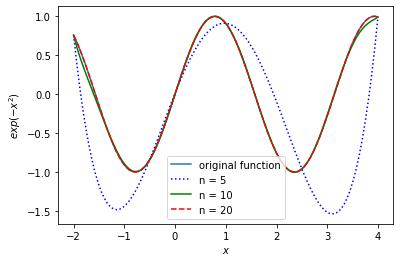

In [117]:
fig = plt.figure()
x = np.linspace(-2, 4, 100)
plt.plot(x, f2(x), label = "original function")
plt.plot(x, p12, ':b', label = "n = 5")
plt.plot(x, p22, '-g', label = "n = 10")
plt.plot(x, p32, '--r', label = "n = 20")
plt.xlabel('$x$')
plt.ylabel('$exp(-x^2)$')
plt.legend()
plt.show()

In [120]:
a13 = NewtonInterpolate(x1, f3(x1))

In [121]:
a23 = NewtonInterpolate(x2, f3(x2))

In [122]:
a33 = NewtonInterpolate(x3, f3(x3))

In [123]:
p13 = Horner(a13, x1, x)

In [124]:
p23 = Horner(a23, x2, x)

In [125]:
p33 = Horner(a33, x3, x)

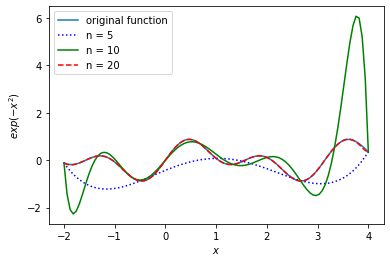

In [126]:
fig = plt.figure()
x = np.linspace(-2, 4, 100)
plt.plot(x, f3(x), label = "original function")
plt.plot(x, p13, ':b', label = "n = 5")
plt.plot(x, p23, '-g', label = "n = 10")
plt.plot(x, p33, '--r', label = "n = 20")
plt.xlabel('$x$')
plt.ylabel('$exp(-x^2)$')
plt.legend()
plt.show()

(e)

In [127]:
def Runge(x):
    result = np.zeros(len(x))
    for i in range(len(x)):
        result[i] = 1/(1+ x[i]**2)
    return result

In [151]:
xr = np.linspace(-3, 3, 15)

In [160]:
xr

array([-3.        , -2.57142857, -2.14285714, -1.71428571, -1.28571429,
       -0.85714286, -0.42857143,  0.        ,  0.42857143,  0.85714286,
        1.28571429,  1.71428571,  2.14285714,  2.57142857,  3.        ])

In [152]:
a = NewtonInterpolate(xr, Runge(xr))

In [153]:
x = np.linspace(-3, 3, 100)

In [154]:
pr =  Horner(a, xr, x)

In [171]:
x_new = 2
r_new = Runge(np.array([x_new]))

In [172]:
a_new = update_interpolation(a, xr, x_new, r_new)

In [180]:
xr_new = np.append(xr, x_new)

In [181]:
pr_new =  Horner(a_new, xr_new, x)

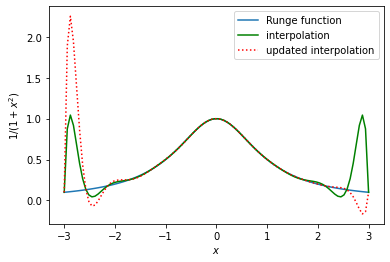

In [182]:
fig = plt.figure()
plt.plot(x, Runge(x), label = "Runge function")
plt.plot(x, pr, '-g', label = "interpolation")
plt.plot(x, pr_new, ':r', label = "updated interpolation")
plt.xlabel('$x$')
plt.ylabel('$1/(1+ x^2)$')
plt.legend()
plt.show()

(f)

In [204]:
def Chebyshev_points(n, a, b):
    points = np.zeros(n)
    for i in range(n):
        points[i] = 0.5*(a+b) + 0.5*(b-a)*math.cos((2*(i+1)-1)*math.pi/(2*n))
        
    return points

In [205]:
Chebyshev_points(20, -2, 4)

array([ 3.990752  ,  3.91710976,  3.7716386 ,  3.55792049,  3.2812179 ,
        2.94834414,  2.56749569,  2.1480503 ,  1.70033609,  1.23537729,
        0.76462271,  0.29966391, -0.1480503 , -0.56749569, -0.94834414,
       -1.2812179 , -1.55792049, -1.7716386 , -1.91710976, -1.990752  ])

In [210]:
Lc1 = np.zeros(20)
Le1 = np.zeros(20)

In [211]:
x = np.linspace(-2, 4, 3001)

In [212]:
for n in range(1, 21):
    xi = np.linspace(-2, 4, n)
    xc = Chebyshev_points(n, -2, 4)
    ai = NewtonInterpolate(xi, f1(xi))
    ac = NewtonInterpolate(xc, f1(xc))
    
    
    pi = Horner(ai, xi, x)
    pc = Horner(ac, xc, x)
    f1_ = f1(x)
    
    Lc1[n-1] = max(abs(f1_ - pc))
    Le1[n-1] = max(abs(f1_ - pi))
                 
    
    
    
    
    

[1.]
[0.36787944]


[ 3.12132034 -1.12132034]
[ 5.87252549e-05 -6.70208376e-02]


[ 3.59807621  1.         -1.59807621]
[ 2.38537927e-06 -1.41595945e-01 -4.87388651e-02]


[ 3.7716386  2.1480503 -0.1480503 -1.7716386]
[ 6.63818074e-07 -6.10390982e-03  1.06043721e-01  6.50450455e-02]


[ 3.85316955  2.76335576  1.         -0.76335576 -1.85316955]
[ 3.56505713e-07 -4.42583796e-04  7.28692452e-02  2.19459650e-02
 -2.93474221e-03]


[ 3.89777748  3.12132034  1.77645714  0.22354286 -1.12132034 -1.89777748]
[ 2.52294375e-07 -7.53073903e-05  1.48776738e-02 -4.79359322e-02
 -3.60387628e-02 -1.50055207e-02]


[ 3.92478374  3.34549445  2.30165122  1.         -0.30165122 -1.34549445
 -1.92478374]
[ 2.04248718e-07 -2.34342137e-05  2.93063061e-03 -3.89394548e-02
 -1.33024203e-02  2.74851290e-03  4.54886334e-03]


[ 3.94235584  3.49440884  2.6667107   1.58527097  0.41472903 -0.6667107
 -1.49440884 -1.94235584]
[ 1.77877704e-07 -1.07112624e-05  7.59535217e-04 -1.59406135e-02
  1.54933334e-02  1.68479

In [223]:
f1(x)

array([1.83156389e-02, 1.84626778e-02, 1.86107483e-02, ...,
       1.16192679e-07, 1.14349762e-07, 1.12535175e-07])

In [213]:
Lc1

array([6.32120559e-01, 7.91871147e-01, 6.67681396e-01, 4.29750411e-01,
       4.35763783e-01, 2.04563559e-01, 1.57638195e-01, 1.00541033e-01,
       4.67171149e-02, 3.74856336e-02, 1.21387078e-02, 1.10306843e-02,
       4.73226588e-03, 2.71544054e-03, 1.42630654e-03, 5.41842976e-04,
       3.62696237e-04, 8.85266611e-05, 7.74984889e-05, 2.39496958e-05])

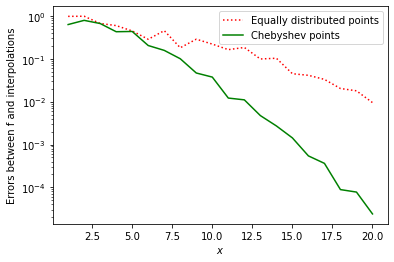

In [218]:
fig = plt.figure()
n = np.linspace(1, 20, 20)
plt.semilogy(n, Le1, ':r', label = "Equally distributed points")
plt.semilogy(n, Lc1, '-g', label = "Chebyshev points")

plt.xlabel('$x$')
plt.ylabel('Errors between f1 and interpolations')
plt.legend()
plt.show()

In [216]:
Lc2 = np.zeros(20)
Le2 = np.zeros(20)

In [217]:
for n in range(1, 21):
    xi = np.linspace(-2, 4, n)
    xc = Chebyshev_points(n, -2, 4)
    ai = NewtonInterpolate(xi, f2(xi))
    ac = NewtonInterpolate(xc, f2(xc))
    
    
    pi = Horner(ai, xi, x)
    pc = Horner(ac, xc, x)
    f2_ = f2(x)
    
    Lc2[n-1] = max(abs(f2_ - pc))
    Le2[n-1] = max(abs(f2_ - pi))
                 

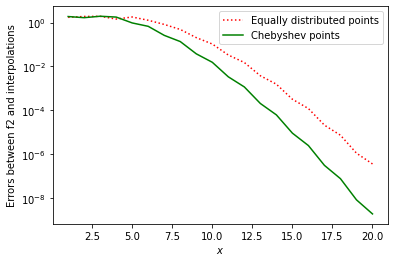

In [219]:
fig = plt.figure()
n = np.linspace(1, 20, 20)
plt.semilogy(n, Le2, ':r', label = "Equally distributed points")
plt.semilogy(n, Lc2, '-g', label = "Chebyshev points")

plt.xlabel('$x$')
plt.ylabel('Errors between f2 and interpolations')
plt.legend()
plt.show()

In [220]:
Lc3 = np.zeros(20)
Le3 = np.zeros(20)

In [221]:
for n in range(1, 21):
    xi = np.linspace(-2, 4, n)
    xc = Chebyshev_points(n, -2, 4)
    ai = NewtonInterpolate(xi, f3(xi))
    ac = NewtonInterpolate(xc, f3(xc))
    
    
    pi = Horner(ai, xi, x)
    pc = Horner(ac, xc, x)
    f3_ = f3(x)
    
    Lc3[n-1] = max(abs(f3_ - pc))
    Le3[n-1] = max(abs(f3_ - pi))
                 

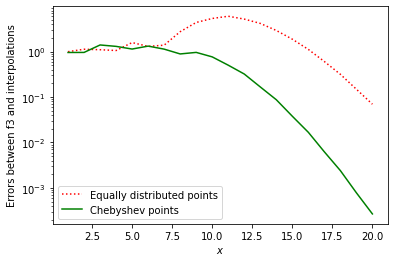

In [222]:
fig = plt.figure()
n = np.linspace(1, 20, 20)
plt.semilogy(n, Le3, ':r', label = "Equally distributed points")
plt.semilogy(n, Lc3, '-g', label = "Chebyshev points")

plt.xlabel('$x$')
plt.ylabel('Errors between f3 and interpolations')
plt.legend()
plt.show()

Problem 2

(a)

In [90]:
def find_zero(k, x, f):
    res = np.zeros((k, 2))
    for i in range(k):
        a = NewtonInterpolate(f[:(i+1)], x[:(i+1)])
        p = Horner(a, x[:(i+1)], np.array([0]))
        res[i][0] = i+1
        res[i][1] = p
        
    return res
        

(b)

In [91]:
def gen_x(n, a, b):
    xi = np.zeros(n)
    for i in range(n):
        xi[i] = a + i*(b-a)/(n-1)
    return xi

In [92]:
def f(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = math.cos(x[i])*math.cosh(x[i])+1
    return y

In [93]:
x1 = gen_x(2, 1.6, 2.1)

In [94]:
f1 = f(x1)

In [99]:
find_zero(2, x1, f1)

array([[1.        , 1.6       ],
       [2.        , 1.99663266]])

The approximation of root for n = 2 is 1.99663266

In [101]:
x2 = gen_x(4, 1.6, 2.1)

In [102]:
f2 = f(x2)

In [103]:
find_zero(4, x2, f2)

array([[1.        , 1.6       ],
       [2.        , 2.1220955 ],
       [3.        , 1.93985767],
       [4.        , 2.02051819]])

The approximation of root for n = 2 is 2.02051819

In [104]:
x3 = gen_x(6, 1.6, 2.1)

In [105]:
f3 = f(x3)

In [106]:
find_zero(6, x3, f3)

array([[1.        , 1.6       ],
       [2.        , 2.15334191],
       [3.        , 1.92432552],
       [4.        , 2.05475654],
       [5.        , 1.98011307],
       [6.        , 2.02049286]])

The approximation of root for n = 2 is 2.02049286

Problem 3

For pk(xi), only if i != k, then pk(xi) = 0 because there would be a term (xi - xi)/(xk - xi). Similar for ql(yi), it is only valid when i = l. Also note that when xi = xk, pk(xi) = 1 and ql(yi) = 1 when i = l. Therefore, akl*pk(xk)*ql(yl) = f(xk, yl), 
i.e., akl = f(xk, yl)

(a)

In [184]:
def f(x, y):
    res = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            res[i][j] = (1 + x[i]**2)**(-1)*(1+y[j]**2)**(-1)
    return res

In [137]:
def L_interpolation(xn, ym, f, x, y):
    res = np.zeros((len(x), len(y)))
    n = len(xn)
    m = len(ym)
    
    for a in range(len(x)):
        for b in range(len(y)):
            z = 0
            
            for i in range(n):
                for j in range(m):
                    p, q = 1.0, 1.0
                    for k in range(n):
                        if k == i:continue
                        p*=(x[a]-xn[k])
                        q*=(xn[i] - xn[k])
                    for l in range(m):
                        if l == j:continue
                        p*=(y[b]-ym[l])
                        q*=(ym[j] - ym[l])
                    z += f[i][j]*p/q
            res[a][b] = z
            
    return res
    

In [138]:
xl = np.zeros(5)
yl = np.zeros(5)

In [139]:
for i in range(1, 6):
    xl[i-1] = -5 + 10*(i-1)/4
    yl[i-1] = -5 + 10*(i-1)/4

In [140]:
fl = f(xl, yl)

In [141]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

In [142]:
Lf = L_interpolation(xl, yl, fl, x, y)

In [143]:
Lf.shape

(100, 100)

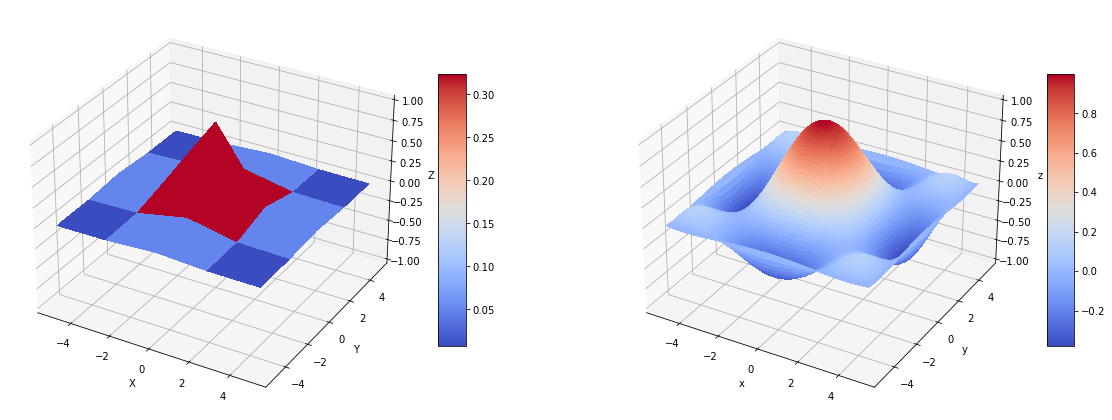

In [291]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

X1, Y1 = np.meshgrid(xl, yl)
x2,y2 = np.meshgrid(x,y)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X1, Y1, fl, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(x2, y2, Lf, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

(b)

In [185]:
xl = np.zeros(5)
yl = np.zeros(5)

In [186]:
for i in range(1, 6):
    xl[i-1] = -5 + 10*(i-1)/4
    yl[i-1] = -5 + 10*(i-1)/4

In [187]:
fl = f(xl, yl)

In [188]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

In [189]:
a = coef(xl, yl, fl)

In [190]:
def newton_basis(x, X, i):
    prod = 1
    for j in range(i-1):
        prod = prod * (x-X[j])
    res = prod
    return res

In [191]:
def coef(X,Y):
    n = len(X)
    m = len(Y)
    F = f(X,Y)
    
    a = np.zeros((n,m))
    a[0][0] = F[0][0]
    a[1][0] = (F[1][0] - a[0][0])/(X[1]-X[0])
    a[0][1] = (F[0][1] - a[0][0])/(Y[1]-Y[0])
    
    for k in range(1,n):
        for l in range(1,m):
            sum_ = 0
            for i in range(k):
                for j in range(l):
                    px = newton_basis(X[k],X,i)
                    qy = newton_basis(Y[l],Y,j)
                    sum_ = sum_ + a[i][j] * px * qy
            
            x_newton = newton_basis(X[k],X,k)
            y_newton = newton_basis(Y[l],Y,l)
            
            a[k][l] = (F[k][l] - sum_)/(x_newton * y_newton)
            
    return a

In [192]:
newton_2d_coef(xl, yl)

array([[ 1.47928994e-03,  1.53029994e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.53029994e-03,  1.75456803e-02,  2.69842889e-02,
         4.27076811e-04,  6.12119976e-06],
       [ 0.00000000e+00,  2.69842889e-02,  3.91165772e-02,
        -4.61529080e-04, -1.52265430e-04],
       [ 0.00000000e+00,  4.27076811e-04, -4.61529080e-04,
        -1.85467193e-03, -2.27212055e-04],
       [ 0.00000000e+00,  6.12119976e-06, -1.52265430e-04,
        -2.27212055e-04,  4.68537737e-05]])

In [193]:
def newton_2d(X,Y, x,y):
    n = len(X)
    m = len(Y)
    
    n_ = len(x)
    m_ = len(y)
    res = np.zeros((n_,m_))
    coef = coef(X,Y)
    
    for i in range(n_):
        for j in range(m_):
            sum_=0
            xi = x[i]
            yj = y[j]
            for k in range(n):
                for l in range(m):
                    akl = coef[k][l]
                    pk = newton_basis(xi, X, k)
                    ql = newton_basis(yj, Y, l)
                    sum_ = sum_ + akl * pk * ql
                    
            res[i][j] = sum_
    return res

In [194]:
fl = f(xl, yl)
LF = newton_2d(xl,yl, x,y)

In [195]:
from matplotlib import cm
%matplotlib inline

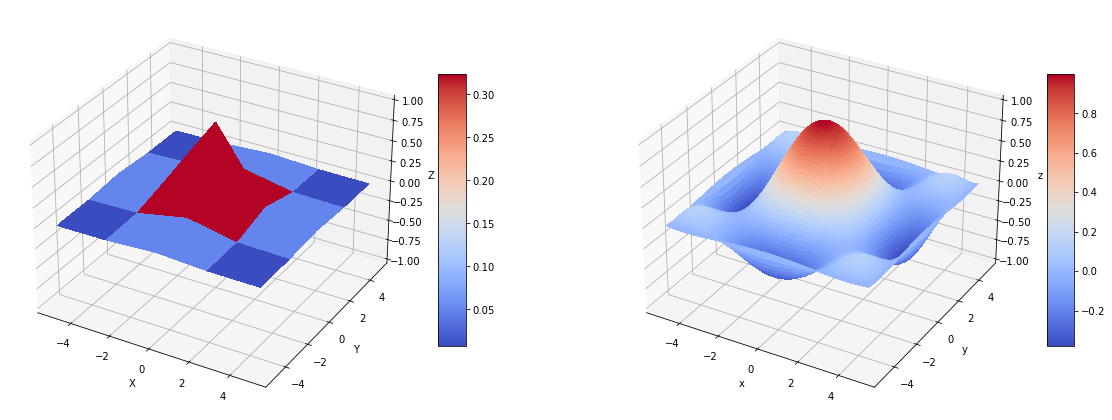

In [197]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

X1, Y1 = np.meshgrid(xl, yl)
x2,y2 = np.meshgrid(x,y)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X1, Y1, fl, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(x2, y2, Lf, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

Problem 5

(a)

In [1]:
def PiecewiseLinear(f):
    m = len(f)
    h = 1/(m-1)
    n = 1/h
    
    c0 = np.zeros(int(n))
    c1 = np.zeros(int(n))
    
    for i in range(1,int(n)):
        c1[i-1] = (f[i] - f[i-1])/h
        c0[i-1] = f[i] - c1[i-1]*i*h
    return (c0, c1)

In [2]:
def func(x):
    n = len(x)
    f = np.zeros(n)
    for i in range(n):
        f[i] = math.sin(3*x[i])
    return f

(b)

In [3]:
def EvalPiecewiseLinear(c0,c1,xnew):
    nc = len(c0)
    h = 1/nc
    nnew = len(xnew)
    
    idx = (np.trunc(xnew/h)).astype(int)
    idx = np.where(idx == nc, nc-1, idx)
    idx = list(map(int, idx))
    
    c1_new = c1[idx]
    c0_new = c0[idx]
    y = c0_new + c1_new * xnew
    
    return y

(c)

In [4]:
def func1(x):
    return np.sin(3*x)

In [7]:
x = np.linspace(0,1,101)
f = func1(x)
c0,c1 = PiecewiseLinear(f)

x1 = np.linspace(0,1,6)
x2 = np.linspace(0,1,11)
x3 = np.linspace(0,1,21)

f1 = EvalPiecewiseLinear(c0,c1,x1)
f2 = EvalPiecewiseLinear(c0,c1,x2)
f3 = EvalPiecewiseLinear(c0,c1,x3)

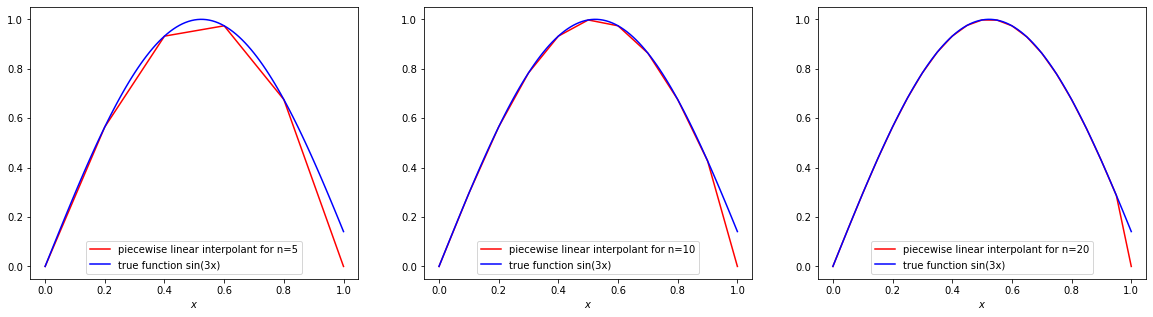

In [8]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].plot(x1, f1,'-r', label="piecewise linear interpolant for n=5")
axs[0].plot(x, f,'b', label="true function sin(3x)")
axs[0].set_xlabel('$x$')
axs[0].legend()

axs[1].plot(x2, f2,'-r', label="piecewise linear interpolant for n=10")
axs[1].plot(x, f,'b', label="true function sin(3x)")
axs[1].set_xlabel('$x$')
axs[1].legend()

axs[2].plot(x3, f3,'-r', label="piecewise linear interpolant for n=20")
axs[2].plot(x, f,'b', label="true function sin(3x)")
axs[2].set_xlabel('$x$')
axs[2].legend()

(d)

##### $||p-f||_{L^2([0,1])} = ( \int_{0}^{1} |p(x)-f(x)|^2 \,dx )^{\frac{1}{2}}$
##### Apply Simpson's Rule, $ \int_{0}^{1} |p(x)-f(x)|^2 \,dx \approx \frac{1-0}{6} (|p(0)-f(0)|^2 + 4|p(0.5)-f(0.5)|^2 + |p(1)-f(1)|^2)$
##### In this problem, I will choose 500 points in the interval [0,1] and apply simpson's rule in every subinterval for an accurate estimate.

In [53]:
def error_cal(func):
    err_seq = []
    err_bond = []
    for n in np.arange(5,101):
        err_bond.append(1/n**2)
        x = np.linspace(0,1,n+1)
        f = func(x)
        c0, c1 = PiecewiseLinear(f)
        x_new = np.linspace(0,1,500)
        p = EvalPiecewiseLinear(c0,c1,x_new)
        diff = p - func(x_new)
        # using Simpson's rule to approximate error
        err_aprox = 0
        for i in range(0,len(diff)-3,2):
            err_aprox_i = x_new[2]/6*(diff[i]**2 + 4*diff[i+1]**2 + diff[i+2]**2)
            err_aprox += err_aprox_i
        err_seq.append(math.sqrt(err_aprox))
    # plot the error sequence
    plt.loglog(np.arange(5,101),err_seq, label = 'Approximate error')
    plt.loglog(np.arange(5,101),err_bond, label = 'Error bound')
    plt.xlabel('n')
    plt.ylabel('$L_{aprox}^2 error$')
    plt.legend()
    plt.show()

In [54]:
def func2(x):
    return np.sin(30*x)

def func3(x):
    return np.exp(x)

def func4(x):
    return pow(x**4,1/3)

def func5(x):
    return abs(x-0.567)

def func6(x):
    y=x-0.5
    z=np.zeros(len(y))
    for i in range(len(y)):
        if y[i]<0:
            z[i] = - (-y[i])**(1./3)
        else:
            z[i] = y[i]**(1./3)
    return z

In [55]:
def Lerr2(p,f):
    diff = p-f
    n = len(diff)
    lerr2 = 0
    
    for i in range(0,n-3,2):
        lerr = math.sqrt((1/6)*((abs(diff[i])**2) + 4*(abs(diff[i+1])**2) + (abs(diff[i+2])**2)))
        lerr2 = lerr2 + lerr
    return lerr2

$f(x)=sin(3x)$

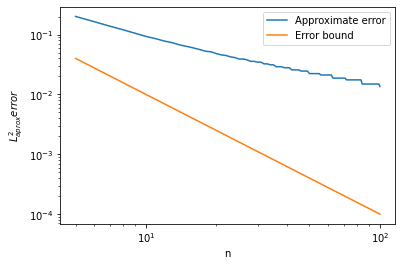

In [56]:
error_cal(func1)

$f(x)=sin(30x)$

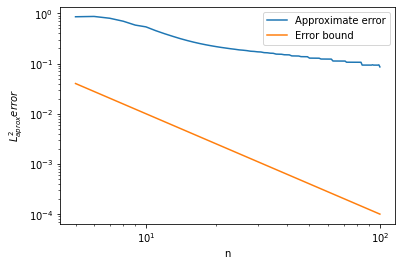

In [57]:
error_cal(func2)

$f(x)=e^x$

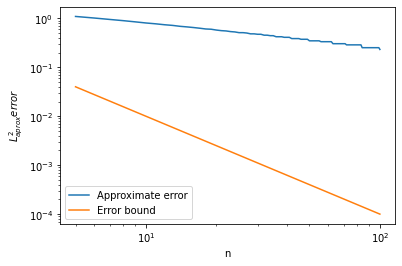

In [58]:
error_cal(func3)

$f(x)=x^{4/3}$

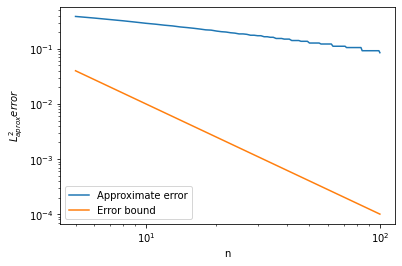

In [59]:
error_cal(func4)

$f(x)=|x-0.567|$

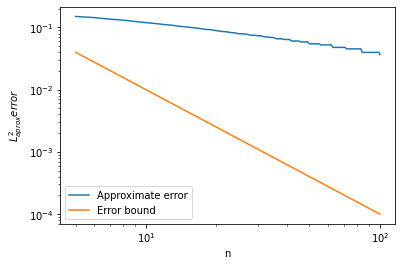

In [60]:
error_cal(func5)

$f(x)=\sqrt[3]{x-\frac{1}{2}}$

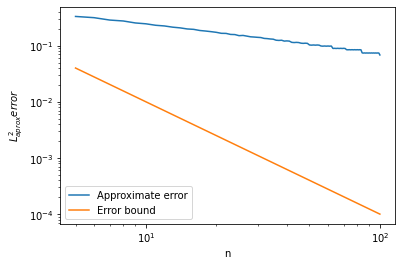

In [61]:
error_cal(func6)

(e)

In [62]:
def error_cal2(func):
    err_seq = []
    err_bond = []
    for n in np.arange(5,101):
        err_bond.append(1/n**2)
        x = np.linspace(0,1,n+1)
        f = func(x)
        c0, c1 = PiecewiseLinear(f)
        x_new = np.linspace(0,1,500)
        p = EvalPiecewiseLinear(c0,c1,x_new)
        diff = p - func(x_new)
        
        err_seq_ = np.linalg.norm(diff)
        err_seq.append(err_seq_)
    # plot the error sequence
    plt.loglog(np.arange(5,101),err_seq, label = 'Approximate error')
    plt.loglog(np.arange(5,101),err_bond, label = 'Error bound')
    plt.xlabel('n')
    plt.ylabel('$L_{aprox}^2 error$')
    plt.legend()
    plt.show()

$f(x)=sin(3x)$

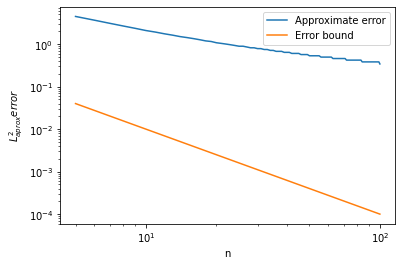

In [63]:
error_cal2(func1)

$f(x)=sin(30x)$

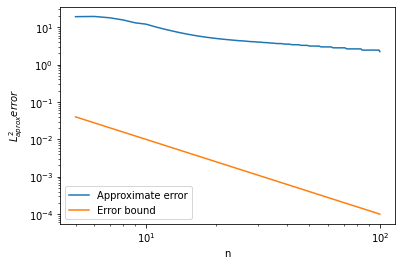

In [64]:
error_cal2(func2)

$f(x)=e^x$

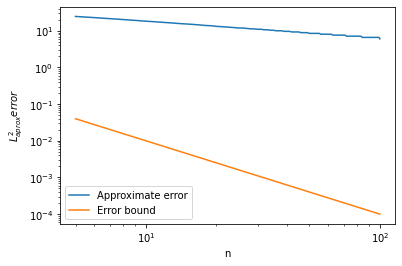

In [65]:
error_cal2(func3)

$f(x)=x^{4/3}$

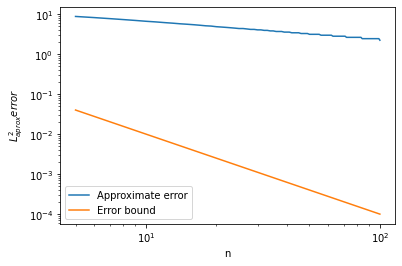

In [66]:
error_cal2(func4)

$f(x)=|x-0.567|$

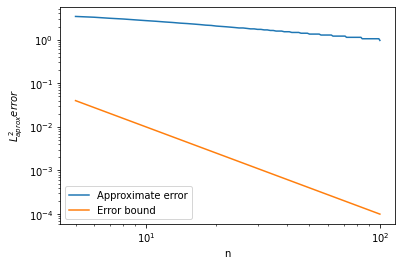

In [67]:
error_cal2(func5)

$f(x)=\sqrt[3]{x-\frac{1}{2}}$

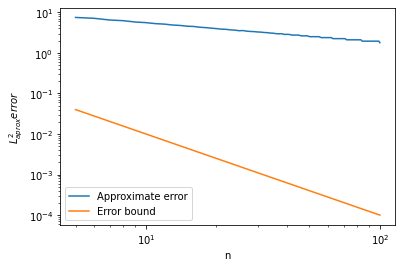

In [68]:
error_cal2(func6)